# **Exploratory Data Analysis For Bob Ross Paintings Data**

**BA820 - Project Proposal - Backup Dataset**

**Team:** B1 Team 13

**Team Members:** Mohamad Gong, Danish Azmi, Suji Kim, Rita Feng

# Introduction

This project analyzes 403 paintings created in the legendary painter Bob Ross's TV program, **"The Joy of Painting."**  The dataset includes information on the types and number of colors used in each episode, as well as image and video links to the corresponding artwork.

The analysis goals of this project are to determine the complexity of Bob Ross's paintings by analyzing the average number of colors he used per artwork, identify his most frequently used "signature" colors, and discover patterns in his preferred color combinations (color palettes) through the correlation between specific colors.

# Setting Up

In [ ]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# Data Importing and Inspection

## Data Importing

In [ ]:
bobross = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-02-21/bob_ross.csv')
bobross

,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,Black_Gesso,...,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
0,282,https://www.twoinchbrush.com/images/painting28...,A Walk in the Woods,1,1,8,https://www.youtube.com/embed/oh5p5f5_-7A,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
1,283,https://www.twoinchbrush.com/images/painting28...,Mt. McKinley,1,2,8,https://www.youtube.com/embed/RInDWhYceLU,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
2,284,https://www.twoinchbrush.com/images/painting28...,Ebony Sunset,1,3,9,https://www.youtube.com/embed/UOziR7PoVco,"['Alizarin Crimson', 'Black Gesso', 'Bright Re...","['#4E1500', '#000000', '#DB0000', '#FFEC00', '...",True,...,False,False,False,True,True,True,True,True,False,True
3,285,https://www.twoinchbrush.com/images/painting28...,Winter Mist,1,4,3,https://www.youtube.com/embed/0pwoixRikn4,"['Prussian Blue', 'Titanium White', 'Van Dyke ...","['#021E44', '#FFFFFF', '#221B15']",False,...,False,False,False,False,True,False,True,True,False,False
4,286,https://www.twoinchbrush.com/images/painting28...,Quiet Stream,1,5,8,https://www.youtube.com/embed/DFSIQNjKRfk,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,407,https://www.twoinchbrush.com/images/painting40...,Evergreen Valley,31,9,14,https://www.youtube.com/embed/mEU0stNfkxI,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#5F2E1F', '...",False,...,False,True,True,True,True,True,True,True,True,True
399,408,https://www.twoinchbrush.com/images/painting40...,Balmy Beach,31,10,13,https://www.youtube.com/embed/kMgd6r6c4vE,"['Alizarin Crimson', 'Black Gesso', 'Bright Re...","['#4E1500', '#000000', '#DB0000', '#FFEC00', '...",True,...,True,True,True,True,False,False,True,True,True,True
400,409,https://www.twoinchbrush.com/images/painting40...,Lake at the Ridge,31,11,12,https://www.youtube.com/embed/8QWvzEQ69Kw,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#5F2E1F', '...",False,...,False,True,True,False,True,True,True,True,True,True
401,410,https://www.twoinchbrush.com/images/painting41...,In the Midst of Winter,31,12,7,https://www.youtube.com/embed/qx2IsmrCs3c,"['Alizarin Crimson', 'Dark Sienna', 'Midnight ...","['#4E1500', '#5F2E1F', '#000000', '#0C0040', '...",False,...,False,True,True,False,True,False,True,True,False,True


## Data Inspection

### Bob Ross Dataset

The `bobross` dataset provides one row per episode of "The Joy of Painting," containing structured metadata such as the season, episode number, painting title, and production links. Most importantly, it includes a color-usage profile for each painting, featuring both a count of pigments used and 18 binary indicators representing the presence of specific paints (e.g., Titanium White, Sap Green). Inspection focuses on confirming data completeness (no missing values), temporal trends in complexity across 31 seasons, and the suitability for identifying stylistic clusters or co-occurrence patterns between different pigments.

| variable           | class     | description                                                                           |
| ------------------ | --------- | ------------------------------------------------------------------------------------- |
| painting_index     | integer   | A unique identifier for each painting across the series.                              |
| img_src            | character | The URL link to the official image of the painting.                                   |
| painting_title     | character | The official name of the painting (e.g., "A Walk in the Woods").                      |
| season             | integer   | The season number of "The Joy of Painting" (1 to 31).                                 |
| episode            | integer   | The episode number within the specific season.                                        |
| num_colors         | integer   | The total count of distinct Bob Ross pigments used in the painting.                   |
| youtube_src        | character | The URL link to the YouTube video of the episode.                                     |
| colors             | character | A list-style string of the names of colors used in the painting.                      |
| color_hex          | character | A list-style string of the hex color codes corresponding to the pigments.             |
| Black_Gesso        | logical   | Binary indicator: TRUE if Black Gesso was used, otherwise FALSE.                      |
| Bright_Red         | logical   | Binary indicator: TRUE if Bright Red was used, otherwise FALSE.                       |
| Burnt_Umber        | logical   | Binary indicator: TRUE if Burnt Umber was used, otherwise FALSE.                      |
| Cadmium_Yellow     | logical   | Binary indicator: TRUE if Cadmium Yellow was used, otherwise FALSE.                   |
| Dark_Sienna        | logical   | Binary indicator: TRUE if Dark Sienna was used, otherwise FALSE.                      |
| Indian_Red         | logical   | Binary indicator: TRUE if Indian Red was used, otherwise FALSE.                       |
| Indian_Yellow      | logical   | Binary indicator: TRUE if Indian Yellow was used, otherwise FALSE.                    |
| Liquid_Black       | logical   | Binary indicator: TRUE if Liquid Black was used, otherwise FALSE.                     |
| Liquid_Clear       | logical   | Binary indicator: TRUE if Liquid Clear was used, otherwise FALSE.                     |
| Midnight_Black     | logical   | Binary indicator: TRUE if Midnight Black was used, otherwise FALSE.                   |
| Phthalo_Blue       | logical   | Binary indicator: TRUE if Phthalo Blue was used, otherwise FALSE.                     |
| Phthalo_Green      | logical   | Binary indicator: TRUE if Phthalo Green was used, otherwise FALSE.                    |
| Prussian_Blue      | logical   | Binary indicator: TRUE if Prussian Blue was used, otherwise FALSE.                    |
| Sap_Green          | logical   | Binary indicator: TRUE if Sap Green was used, otherwise FALSE.                        |
| Titanium_White     | logical   | Binary indicator: TRUE if Titanium White was used, otherwise FALSE.                   |
| Van_Dyke_Brown     | logical   | Binary indicator: TRUE if Van Dyke Brown was used, otherwise FALSE.                   |
| Yellow_Ochre       | logical   | Binary indicator: TRUE if Yellow Ochre was used, otherwise FALSE.                     |
| Alizarin_Crimson   | logical   | Binary indicator: TRUE if Alizarin Crimson was used, otherwise FALSE.                 |

In [ ]:
print("Dataset Info:")
print(bobross.info())

print("\nFirst 5 rows:")
print(bobross.head())

print("\nColumn Names:")
print(bobross.columns.tolist())

print("\nMissing Values:")
print(bobross.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   painting_index    403 non-null    int64 
 1   img_src           403 non-null    object
 2   painting_title    403 non-null    object
 3   season            403 non-null    int64 
 4   episode           403 non-null    int64 
 5   num_colors        403 non-null    int64 
 6   youtube_src       403 non-null    object
 7   colors            403 non-null    object
 8   color_hex         403 non-null    object
 9   Black_Gesso       403 non-null    bool  
 10  Bright_Red        403 non-null    bool  
 11  Burnt_Umber       403 non-null    bool  
 12  Cadmium_Yellow    403 non-null    bool  
 13  Dark_Sienna       403 non-null    bool  
 14  Indian_Red        403 non-null    bool  
 15  Indian_Yellow     403 non-null    bool  
 16  Liquid_Black      403 non-null    bool  
 17  Li

The data specifies the color combinations Bob Ross used in each artwork, so before starting EDA, we found out how many unique colors he used in total and what those colors are.

In [ ]:
bobross['all_colors'] = bobross['colors'].apply(lambda x: [c.strip() for c in ast.literal_eval(x)])
all_colors_flat = [color for sublist in bobross['all_colors'] for color in sublist]
unique_colors = sorted(list(set(all_colors_flat)))

print(f"Total {len(unique_colors)} unique colors:")
print(unique_colors)

Total 18 unique colors:
['Alizarin Crimson', 'Black Gesso', 'Bright Red', 'Burnt Umber', 'Cadmium Yellow', 'Dark Sienna', 'Indian Red', 'Indian Yellow', 'Liquid Black', 'Liquid Clear', 'Midnight Black', 'Phthalo Blue', 'Phthalo Green', 'Prussian Blue', 'Sap Green', 'Titanium White', 'Van Dyke Brown', 'Yellow Ochre']


Using the color names we found, we standardize the format to match the column names in the actual dataframe.

In [ ]:
color_cols = [c.replace(' ', '_') for c in unique_colors]
color_cols = [col for col in color_cols if col in bobross.columns]
color_cols

['Alizarin_Crimson',
 'Black_Gesso',
 'Bright_Red',
 'Burnt_Umber',
 'Cadmium_Yellow',
 'Dark_Sienna',
 'Indian_Red',
 'Indian_Yellow',
 'Liquid_Black',
 'Liquid_Clear',
 'Midnight_Black',
 'Phthalo_Blue',
 'Phthalo_Green',
 'Prussian_Blue',
 'Sap_Green',
 'Titanium_White',
 'Van_Dyke_Brown',
 'Yellow_Ochre']

The dataset used in this project already has all episode information and color data structured into a single consolidated file, eliminating the need for data preparation. All observations in the dataset follow the same schema, and missing values ​​and duplicate data have been pre-cleaned, resulting in high data integrity.

# Exploratory Data Analysis (EDA)

## Part 1. Stylistic Segmentation via K-Means Clustering

The purpose of this analysis is not simply to view the 403 Bob Ross paintings as just "pictures," but to determine if data-driven style grouping is possible based on the color combinations (pigment profiles) used. This will serve as the foundation for an algorithm that recommends "content with a similar atmosphere" to viewers in the future.

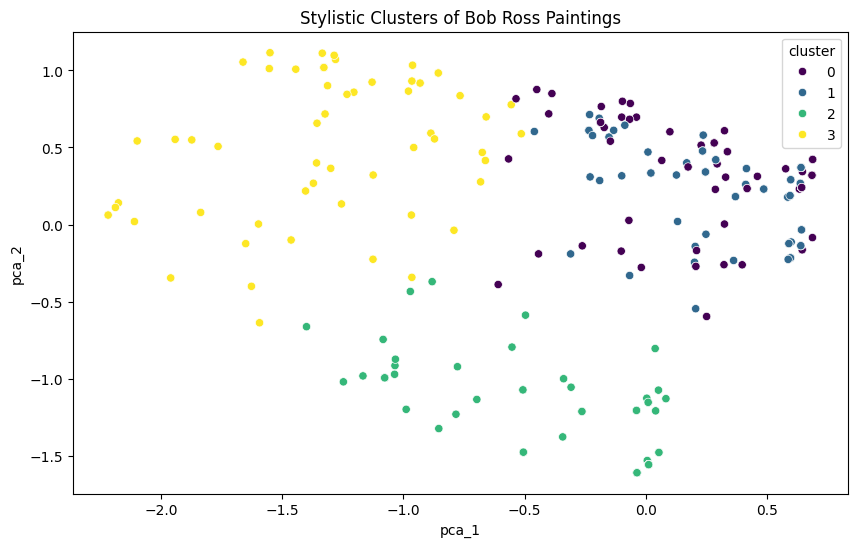

0      A Walk in the Woods
1             Mt. McKinley
2             Ebony Sunset
3              Winter Mist
5              Winter Moon
11               Snow Fall
79           Secluded Lake
80    Evergreens at Sunset
81          Mountain Cabin
85       Mountain Splendor
87          Mountain Glory
95          Hunter's Haven
Name: painting_title, dtype: object


In [ ]:
# K-Means Clusteringl - 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
bobross['cluster'] = kmeans.fit_predict(bobross[color_cols])

# Visualize using PCA (Reducing 18 colors to 2 dimensions for a plot)
pca = PCA(n_components=2)
coords = pca.fit_transform(bobross[color_cols])
bobross['pca_1'], bobross['pca_2'] = coords[:, 0], coords[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=bobross, x='pca_1', y='pca_2', hue='cluster', palette='viridis')
plt.title('Stylistic Clusters of Bob Ross Paintings')
plt.show()

print(bobross.groupby('cluster')['painting_title'].head(3))

**Cluster Formation:** When the 18-dimensional color data is reduced to two dimensions (using PCA) and visualized, the data points are seen to be divided into four distinct groups with clear boundaries, without overlapping.

**Style Identity:** Each cluster (0-3) reflects a typical painting style of Bob Ross (winter mountains, summer forests, sunsets, coastlines, etc.). For example, if a particular cluster contains titles with words like 'Winter' and 'Snow', that cluster is automatically classified as having a 'winter theme'.

This part analyzes the dominant colors used in each cluster (Signature Palette) and compare them with the actual artwork titles.

In [ ]:
# 1.0 = color is used in 100% of paintings in that cluster
cluster_summary = bobross.groupby('cluster')[color_cols].mean()

# Loop through each cluster to see its "Signature Colors"
for i in range(4):
    print(f"\n Cluster {i} Signature Palette")
    top_colors = cluster_summary.loc[i].sort_values(ascending=False).head(5)
    print(top_colors)

    samples = bobross[bobross['cluster'] == i]['painting_title'].sample(3).values
    print(f"Sample Paintings: {samples}")


 Cluster 0 Signature Palette
Titanium_White      1.000000
Midnight_Black      0.980392
Alizarin_Crimson    0.960784
Cadmium_Yellow      0.950980
Yellow_Ochre        0.950980
Name: 0, dtype: float64
Sample Paintings: ['Rippling Waters' 'Mountain Path' 'Hazy Day']

 Cluster 1 Signature Palette
Titanium_White    1.000000
Prussian_Blue     1.000000
Midnight_Black    1.000000
Yellow_Ochre      0.993976
Cadmium_Yellow    0.987952
Name: 1, dtype: float64
Sample Paintings: ['Shadow Pond' 'In the Stillness of Morning' 'Falls in the Glen']

 Cluster 2 Signature Palette
Alizarin_Crimson    1.000000
Titanium_White      0.985915
Van_Dyke_Brown      0.985915
Cadmium_Yellow      0.957746
Sap_Green           0.929577
Name: 2, dtype: float64
Sample Paintings: ['The Old Mill' 'Blue Moon' 'Secluded Forest']

 Cluster 3 Signature Palette
Titanium_White      0.968750
Midnight_Black      0.781250
Prussian_Blue       0.765625
Van_Dyke_Brown      0.750000
Alizarin_Crimson    0.734375
Name: 3, dtype: float64


**Average Value (0.0 ~ 1.0):** The closer the average value of a specific color is to 1.0, the more likely that color is to be present in all the images within that cluster.

**Signature Palette:** By looking at the top 5 colors in each cluster, we can understand the "dominant mood" of that group.

## Part 2. Feature Association: Discovering the "Color Co-occurrence" Structure

In Bob Ross's paintings, colors are not used independently. Correlation analysis of the color palettes allows the recommendation engine to define a similar atmosphere based on these colors.

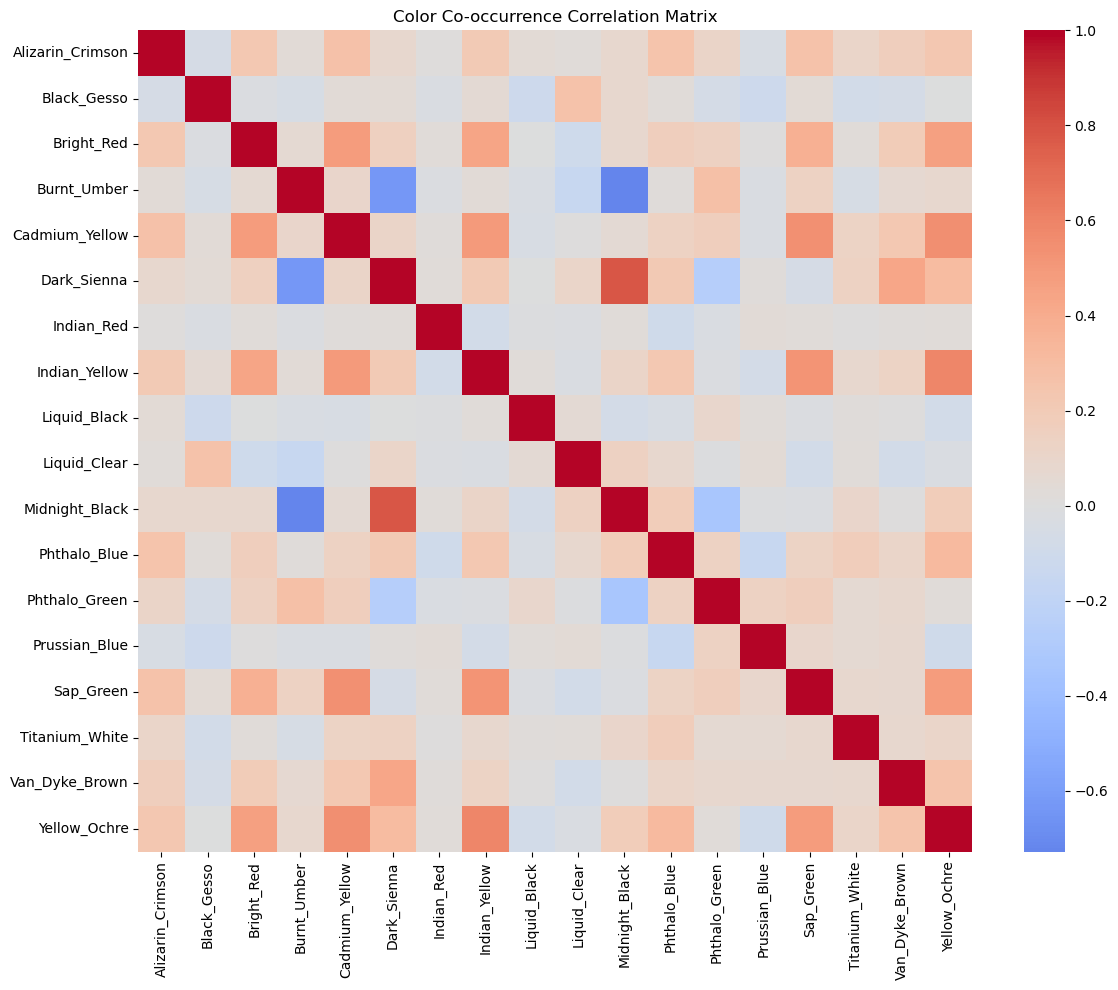

In [ ]:
plt.figure(figsize=(12, 10))
corr = bobross[color_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Color Co-occurrence Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
corr = bobross[color_cols].corr()
pairs = corr.unstack().sort_values(ascending=False)
strong_links = pairs[(pairs < 1) & (pairs > 0.5)] # Correlations above 0.5
print("Strongly Linked Colors:")
print(strong_links)

Strongly Linked Colors:
Midnight_Black  Dark_Sienna       0.780478
Dark_Sienna     Midnight_Black    0.780478
Yellow_Ochre    Indian_Yellow     0.583129
Indian_Yellow   Yellow_Ochre      0.583129
Cadmium_Yellow  Yellow_Ochre      0.550660
Yellow_Ochre    Cadmium_Yellow    0.550660
Sap_Green       Cadmium_Yellow    0.537677
Cadmium_Yellow  Sap_Green         0.537677
Indian_Yellow   Sap_Green         0.523391
Sap_Green       Indian_Yellow     0.523391
dtype: float64


It can be seen that he most frequently used the combination of Midnight Black and Dark Sienna, and the combination of Dark Sienna and Midnight Black.

## Part 3. Seasonality of Complexity: Analyzing Temporal Style Stability

This section aims to understand how Bob Ross's teaching curriculum evolved over time.

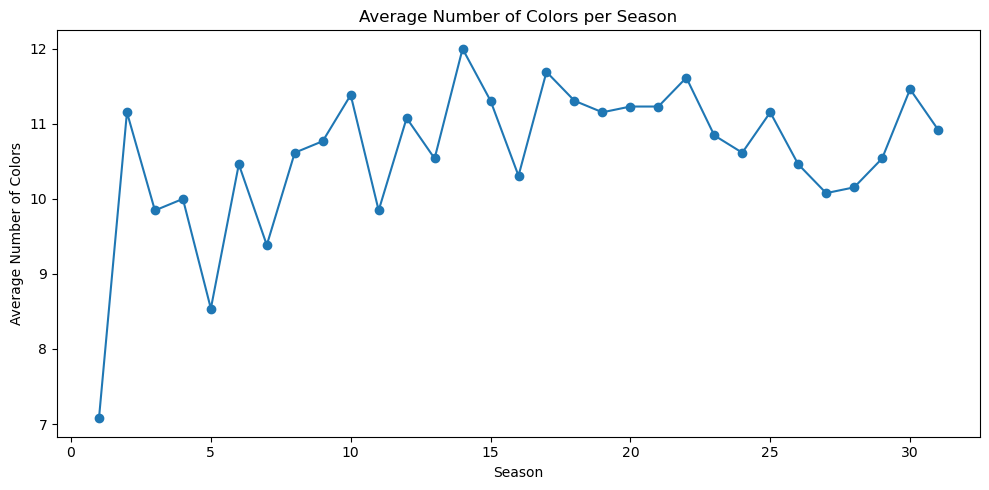

In [ ]:
avg_colors_per_season = bobross.groupby('season')['num_colors'].mean()
plt.figure(figsize=(10, 5))
plt.plot(avg_colors_per_season.index, avg_colors_per_season.values, marker='o')
plt.title('Average Number of Colors per Season')
plt.xlabel('Season')
plt.ylabel('Average Number of Colors')
plt.tight_layout()
plt.show()

**Upward Trend:** This suggests that as the seasons progressed, the viewers' sophistication increased, leading to the introduction of more complex and refined techniques.

**Sudden Fluctuations (Spikes/Dips):** If a particular season used significantly more (or fewer) colors than usual, it can be inferred that experimental techniques or a special theme were introduced during that season.

## Part 4. Tracking Thematic Shifts: Evolutionary Analysis of Representative Pigments

To track usage of top colors across seasons, we selected representative pigments symbolizing the three core themes that define Bob Ross's painting style - nature/forest, water, and atmosphere/light - and tracked the changes in their usage frequency over 31 seasons.

* **Sap Green:** Indicator of Nature/Forests

* **Phthalo Blue:** Indicator of Water/Atmosphere

* **Indian Yellow:** Indicator of Light/Detail

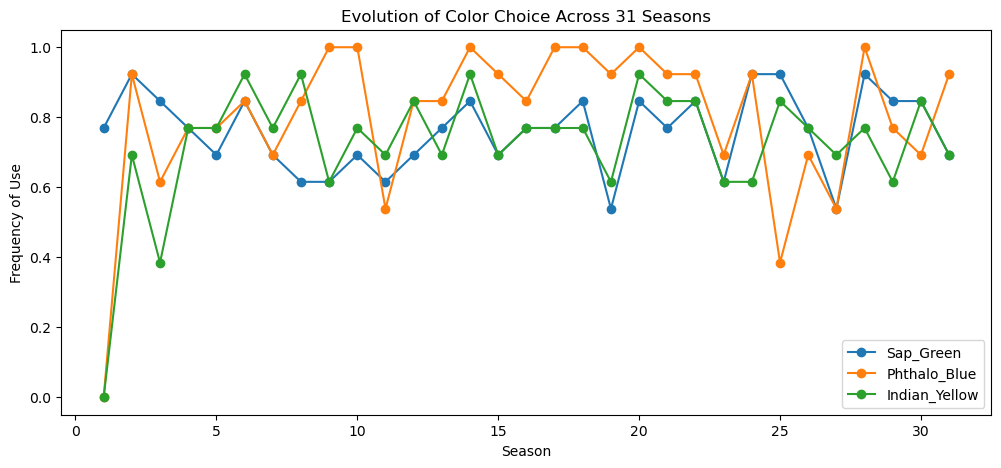

In [ ]:
top_colors = ['Sap_Green', 'Phthalo_Blue', 'Indian_Yellow']
seasonal_usage = bobross.groupby('season')[top_colors].mean()

plt.figure(figsize=(12, 5))
for color in top_colors:
    plt.plot(seasonal_usage.index, seasonal_usage[color], label=color, marker='o')

plt.title('Evolution of Color Choice Across 31 Seasons')
plt.xlabel('Season')
plt.ylabel('Frequency of Use')
plt.legend()
plt.show()

If the analysis reveals that the use of "Phthalo Blue" is concentrated in a specific season (e.g., seasons 16 - 22), the streaming service can automatically categorize this period as a "Cool Summer Special: Beach Collection" and suggest it to users.

## Part 5. Pigment Frequency Analysis: Identifying Core vs. Niche Features

This analysis measures the frequency of 18 different colors used across all 403 artworks.

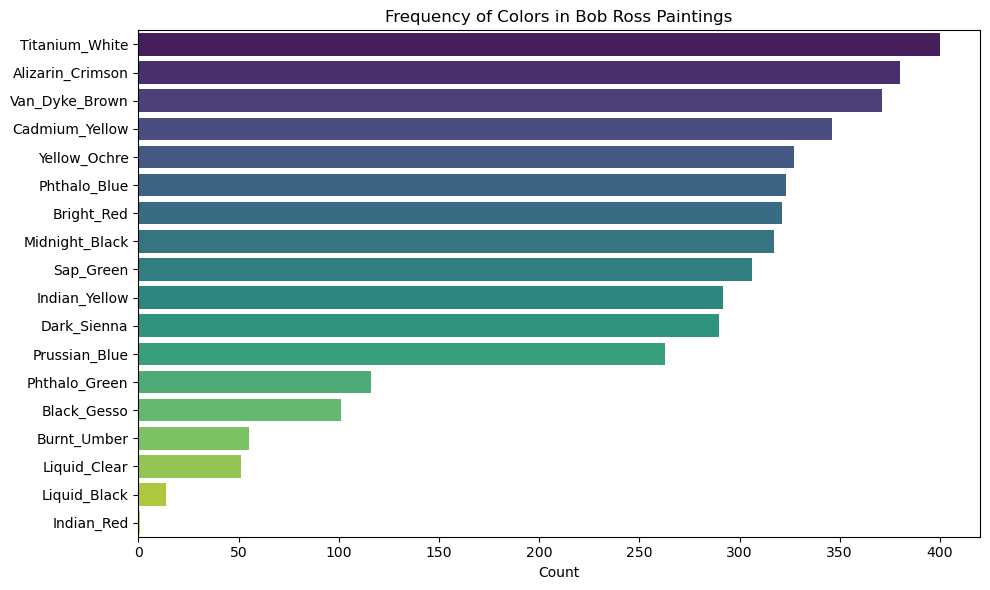

In [ ]:
color_counts = bobross[color_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=color_counts.values, y=color_counts.index, palette='viridis')
plt.title('Frequency of Colors in Bob Ross Paintings')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

**Dominant Colors:** Titanium White and Alizarin Crimson are the common denominators that appear in almost every artwork.

**Rare Colors:** Colors with very low frequency, such as Indian Red or Liquid Black, determine the rarity of an artwork.

## Part 6. Title Word Frequency: Semantic Analysis of Content Themes

This section aims to extract key keywords from unstructured data, specifically "artwork titles," through text mining. It examines the consistency between color data (visual elements) and title data (semantic elements), and quantitatively identifies, through linguistic analysis, the core themes that Bob Ross intended to convey through his artwork.

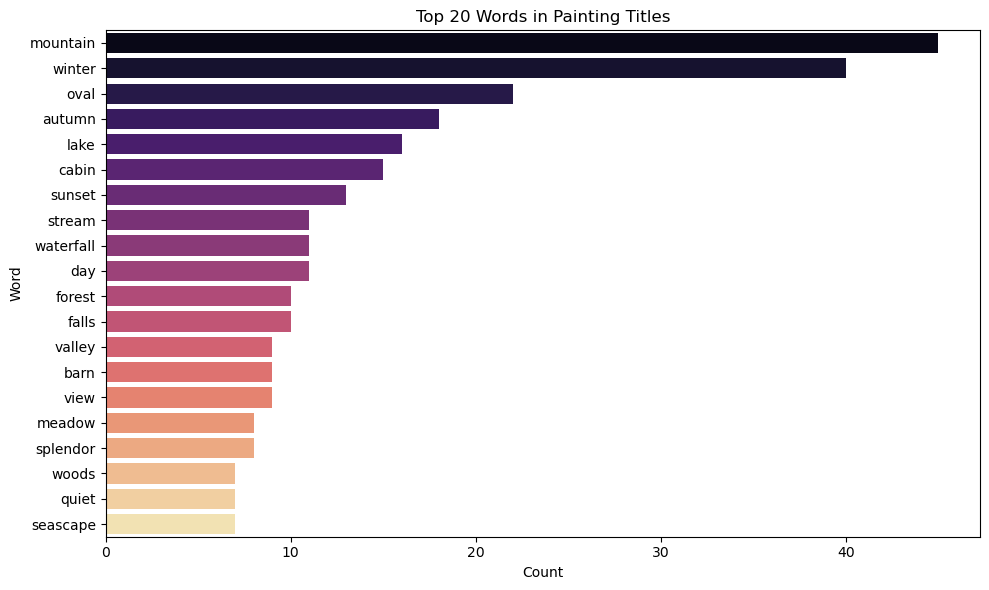

In [ ]:
all_titles = " ".join(bobross['painting_title'].dropna())
words = re.findall(r'\w+', all_titles.lower())
stop_words = set(['a', 'an', 'the', 'in', 'of', 'at', 'on', 'by', 'and', 'with', 'to', 'for'])
filtered_words = [w for w in words if w not in stop_words and len(w) > 2]

word_counts = Counter(filtered_words).most_common(20)
words_df = pd.DataFrame(word_counts, columns=['Word', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=words_df, palette='magma')
plt.title('Top 20 Words in Painting Titles')
plt.tight_layout()
plt.show()

**Dominant Keywords:** "Mountain," "Winter," and "Lake" are among the top keywords. This shows that Bob Ross's work focuses on specific natural landscapes, and demonstrates a high degree of consistency between the visual clusters identified in the previous clustering results and the meaning of the titles.

**Structural Keywords:** The high frequency of words like "Oval" provides information about the composition of the artwork. This allows us to understand not only the simple depiction of landscapes but also the physical constraints of the canvas shape as data.